In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns

**3.1**	Read the data file credit_data.csv into a dataframe named "credit".

[1 Mark]

In [2]:
credit = pd.read_csv('credit_data.csv')

**3.2**	Inspect the data by:
* Displaying the last 20 records of the dataset.
* Generating a concise summary of the dataframe such as the index, data type, columns, non-null values and memory usage.
* Displaying the number of unique values for each feature.

[3 Marks]

In [3]:
credit.tail(20)

,Record_Nr,Customer_ID,Credit_Limit,Total_Credit_Cards,Total_Bank_Visits,Total_Online_Visits,Total_Calls_Made
640,641,99843,123000,8,1,15,2
641,642,27212,144000,10,0,10,2
642,643,91575,97000,10,1,9,2
643,644,60190,98000,9,0,8,2
644,645,18519,127000,10,1,15,1
645,646,48762,171000,10,0,15,0
646,647,58392,186000,7,0,8,1
647,648,79953,183000,9,0,9,2
648,649,13315,111000,8,1,7,0
649,650,30570,112000,10,1,8,1


In [4]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 7 columns):
Record_Nr              660 non-null int64
Customer_ID            660 non-null int64
Credit_Limit           660 non-null int64
Total_Credit_Cards     660 non-null int64
Total_Bank_Visits      660 non-null int64
Total_Online_Visits    660 non-null int64
Total_Calls_Made       660 non-null int64
dtypes: int64(7)
memory usage: 36.2 KB


In [5]:
credit.nunique()

Record_Nr              660
Customer_ID            655
Credit_Limit           110
Total_Credit_Cards      10
Total_Bank_Visits        6
Total_Online_Visits     16
Total_Calls_Made        11
dtype: int64

**3.3**	Discuss why there is a difference between the number of unique values of the Record_Nr feature and the number of unique values of the Customer_ID feature. (Print your answer in the Jupyter notebook)

[2 Marks]

* The Customer_ID column might contain repeated Customer ID values, in other words the same customer's ID might be contained in the Customer_ID column multiple times.

**3.4**	Handle the issue identified in 3.3:
* Show proof of the issue that you identified.
* Rectify the issue.
* Show proof that the issue has been rectified.

[3 Marks]

In [6]:
#If the student could not identify the relevant issue the student loses marks for not rectifying the issue,
#but the rest of the notebook is marked with the students mistake
duplicate_customers = credit[credit.duplicated('Customer_ID')]
print(duplicate_customers)

     Record_Nr  Customer_ID  Credit_Limit  Total_Credit_Cards  \
332        333        47437         17000                   7   
398        399        96929         67000                   6   
432        433        37252         59000                   6   
541        542        50706         60000                   7   
632        633        97935        187000                   7   

     Total_Bank_Visits  Total_Online_Visits  Total_Calls_Made  
332                  3                    1                 0  
398                  2                    2                 2  
432                  2                    1                 2  
541                  5                    2                 2  
632                  1                    7                 0  


In [7]:
credit = credit.drop_duplicates(subset='Customer_ID', keep='first')
duplicate_customers = credit[credit.duplicated('Customer_ID')]
print(duplicate_customers)

Empty DataFrame
Columns: [Record_Nr, Customer_ID, Credit_Limit, Total_Credit_Cards, Total_Bank_Visits, Total_Online_Visits, Total_Calls_Made]
Index: []


**3.5**	Discard the Record_Nr and Customer_ID features, since they are not required for our analysis.

[1 Mark]

In [8]:
credit.drop(columns = ['Record_Nr', 'Customer_ID'], inplace = True)
credit.head(20)

,Credit_Limit,Total_Credit_Cards,Total_Bank_Visits,Total_Online_Visits,Total_Calls_Made
0,100000,2,1,1,0
1,50000,3,0,10,9
2,50000,7,1,3,4
3,30000,5,1,1,4
4,100000,6,0,12,3
5,20000,3,0,1,8
6,100000,5,0,11,2
7,15000,3,0,1,1
8,5000,2,0,2,2
9,3000,4,0,1,7


**3.6**	Use k-Means clustering to train a machine learning model that will have the capability to distinguish between different credit card users.
* Make sure all pre-processing is complete.
* Determine the best value for k by plotting an elbow curve, as well as the silhouette score, and comparing the values of the two plots with each other.	 
* Train the model, predict the labels and print the labels of the trained model.
* Print the cluster centres that were identified by the model.

[10 Marks]

In [9]:
#The input data needs to be scaled
#Lose 2 marks if students forget to scale the data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
credit = pd.DataFrame(scaler.fit_transform(credit), columns=credit.columns)
credit.head()

,Credit_Limit,Total_Credit_Cards,Total_Bank_Visits,Total_Online_Visits,Total_Calls_Made
0,1.767076,-1.241704,-0.858568,-0.546642,-1.257006
1,0.423440,-0.780379,-1.471163,2.516526,1.884177
2,0.423440,1.064922,-0.858568,0.134062,0.139075
3,-0.114014,0.142271,-0.858568,-0.546642,0.139075
4,1.767076,0.603597,-1.471163,3.197230,-0.209945


In [10]:
import sklearn.metrics
from sklearn.cluster import KMeans

sse = []
k_range = range(1,10)

for k in k_range:
    kmeans = KMeans(n_clusters = k, max_iter = 1000, random_state = 0)
    kmeans.fit(credit)
    sse.append(kmeans.inertia_)

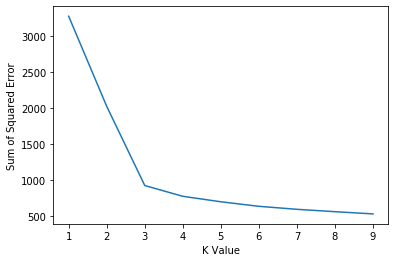

In [11]:
plt.xlabel('K Value')
plt.ylabel('Sum of Squared Error')
plt.plot(k_range, sse)

In [12]:
score = []

k_range = range(2,10)
for k in k_range:
    kmeans = KMeans(n_clusters = k, max_iter = 1000, random_state = 0)
    y_predicted = kmeans.fit_predict(credit)
    score.append(sklearn.metrics.silhouette_score(credit, y_predicted, metric='euclidean'));

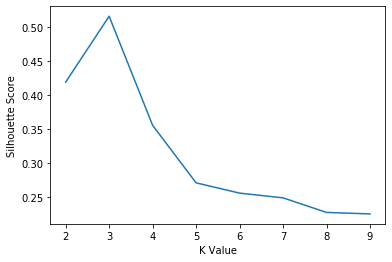

In [13]:
plt.xlabel('K Value')
plt.ylabel('Silhouette Score')
plt.plot(k_range, score)

In [14]:
X = credit.values

model = KMeans(n_clusters = 3, random_state = 0)
y = model.fit_predict(X)
print(f"Labels: {y}")
print(f"Cluster centers: {model.cluster_centers_}")

Labels: [0 2 0 0 1 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 

**3.7**	Visualise the data:
* Create scatter plots between the different pairs of features. This should give you 10 separate scatter plots.
* Show the clusters that were identified by the model within the data by means of different colours.
* Also plot the centroids of the clusters on the same scatter plot.

[5 Marks]

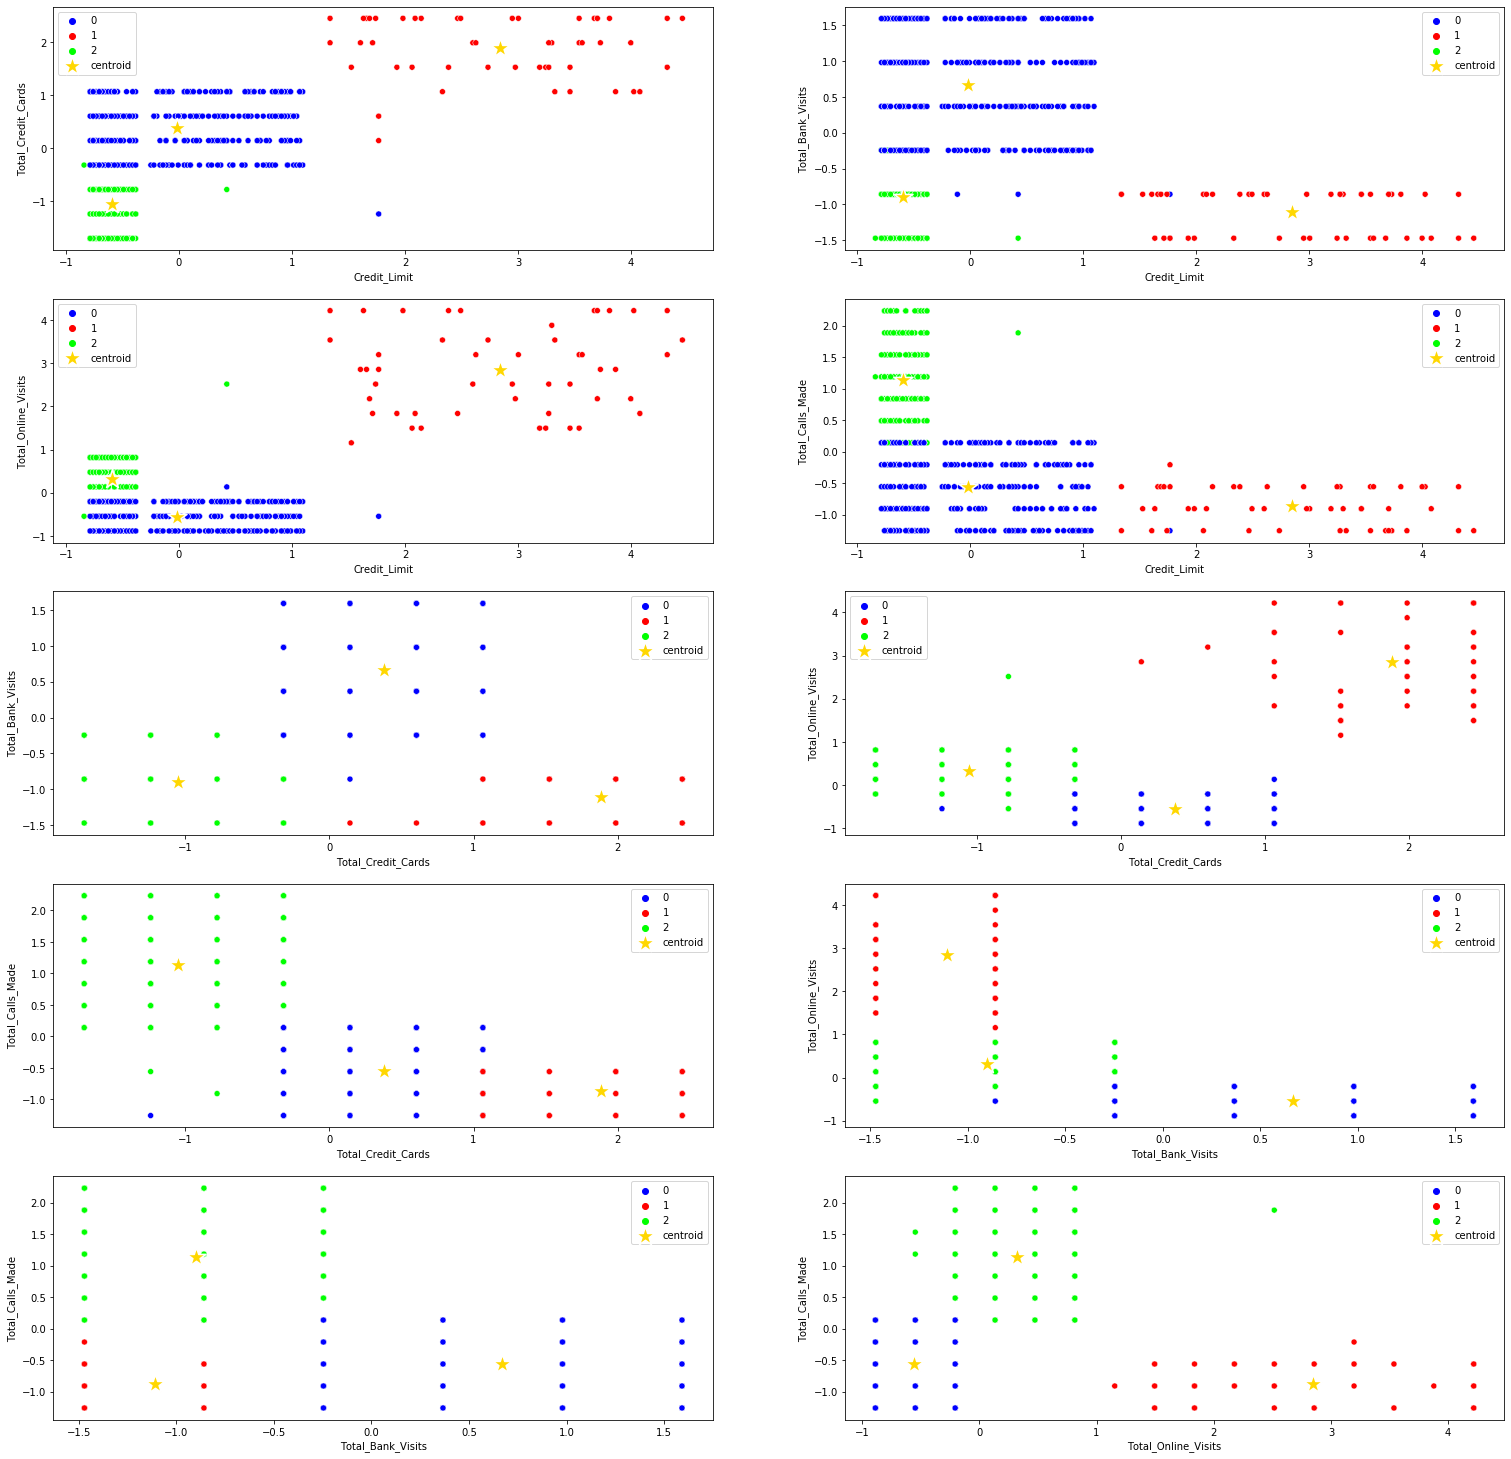

In [15]:
f, axes = plt.subplots(nrows = 5, ncols = 2, figsize = (26, 26))
sns.scatterplot(data = credit, x = "Credit_Limit", y = "Total_Credit_Cards", ax = axes[0,0], hue = y, palette = 'brg')
sns.scatterplot(data = model.cluster_centers_, x = model.cluster_centers_[:,0], y = model.cluster_centers_[:,1], ax = axes[0,0], color='gold', marker='*', label='centroid', s=400)

sns.scatterplot(data = credit, x = "Credit_Limit", y = "Total_Bank_Visits", ax = axes[0,1], hue = y, palette = 'brg')
sns.scatterplot(data = model.cluster_centers_, x = model.cluster_centers_[:,0], y = model.cluster_centers_[:,2], ax = axes[0,1], color='gold', marker='*', label='centroid', s=400)

sns.scatterplot(data = credit, x = "Credit_Limit", y = "Total_Online_Visits", ax = axes[1,0], hue = y, palette = 'brg')
sns.scatterplot(data = model.cluster_centers_, x = model.cluster_centers_[:,0], y = model.cluster_centers_[:,3], ax = axes[1,0], color='gold', marker='*', label='centroid', s=400)

sns.scatterplot(data = credit, x = "Credit_Limit", y = "Total_Calls_Made", ax = axes[1,1], hue = y, palette = 'brg')
sns.scatterplot(data = model.cluster_centers_, x = model.cluster_centers_[:,0], y = model.cluster_centers_[:,4], ax = axes[1,1], color='gold', marker='*', label='centroid', s=400)

sns.scatterplot(data = credit, x = "Total_Credit_Cards", y = "Total_Bank_Visits", ax = axes[2,0], hue = y, palette = 'brg')
sns.scatterplot(data = model.cluster_centers_, x = model.cluster_centers_[:,1], y = model.cluster_centers_[:,2], ax = axes[2,0], color='gold', marker='*', label='centroid', s=400)

sns.scatterplot(data = credit, x = "Total_Credit_Cards", y = "Total_Online_Visits", ax = axes[2,1], hue = y, palette = 'brg')
sns.scatterplot(data = model.cluster_centers_, x = model.cluster_centers_[:,1], y = model.cluster_centers_[:,3], ax = axes[2,1], color='gold', marker='*', label='centroid', s=400)

sns.scatterplot(data = credit, x = "Total_Credit_Cards", y = "Total_Calls_Made", ax = axes[3,0], hue = y, palette = 'brg')
sns.scatterplot(data = model.cluster_centers_, x = model.cluster_centers_[:,1], y = model.cluster_centers_[:,4], ax = axes[3,0], color='gold', marker='*', label='centroid', s=400)

sns.scatterplot(data = credit, x = "Total_Bank_Visits", y = "Total_Online_Visits", ax = axes[3,1], hue = y, palette = 'brg')
sns.scatterplot(data = model.cluster_centers_, x = model.cluster_centers_[:,2], y = model.cluster_centers_[:,3], ax = axes[3,1], color='gold', marker='*', label='centroid', s=400)

sns.scatterplot(data = credit, x = "Total_Bank_Visits", y = "Total_Calls_Made", ax = axes[4,0], hue = y, palette = 'brg')
sns.scatterplot(data = model.cluster_centers_, x = model.cluster_centers_[:,2], y = model.cluster_centers_[:,4], ax = axes[4,0], color='gold', marker='*', label='centroid', s=400)

sns.scatterplot(data = credit, x = "Total_Online_Visits", y = "Total_Calls_Made", ax = axes[4,1], hue = y, palette = 'brg')
sns.scatterplot(data = model.cluster_centers_, x = model.cluster_centers_[:,3], y = model.cluster_centers_[:,4], ax = axes[4,1], color='gold', marker='*', label='centroid', s=400)

**3.8**	Evaluate and discuss the k-value that was obtained from the elbow curve in relation to the number of clusters that are visible within the scatter plots.

[2 Marks]

* The elbow curve indicated that the best value for k is 3. As can be seen in the scatter plots, the model was able to identify 3 clusters which agrees with the k-value of 3 identified by the elbow curve.